In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('employee_insurance_dataset.csv')
df.head()

,Age,Insurance_Eligible
0,58,1
1,48,1
2,34,0
3,27,0
4,40,1


In [4]:
df.isnull().sum()

Age                   0
Insurance_Eligible    0
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

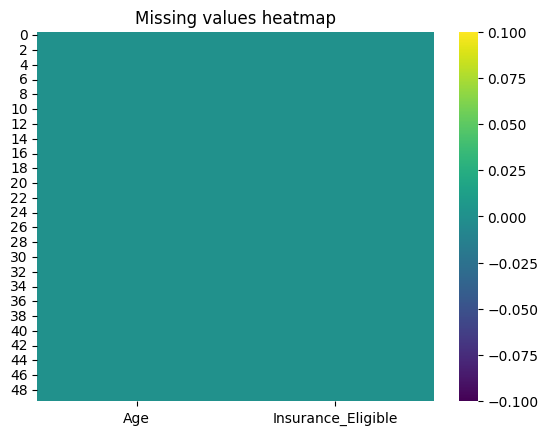

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cmap='viridis')
plt.title('Missing values heatmap')

In [7]:
X = df.drop(columns=['Insurance_Eligible'])
y=df['Insurance_Eligible']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
mod=LinearRegression()
mod.fit(X_train, y_train)
mod2=LogisticRegression()
mod2.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
y_pred = mod.predict(X_test)
y_pred2 = mod2.predict(X_test)

In [13]:
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print(f'mse={mse}; r2={r2}')

acc_score=accuracy_score(y_test,y_pred2)
print("Accuracy:", acc_score)

mse=0.14327814725835855; r2=0.4268874109665658
Accuracy: 0.8


Text(0.5, 1.0, 'Actual vs Predicted Eligibilty')

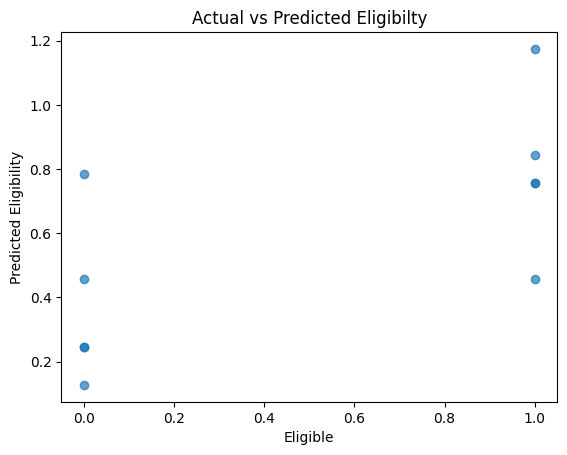

In [14]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Eligible")
plt.ylabel("Predicted Eligibility")
plt.title("Actual vs Predicted Eligibilty")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_range = np.linspace(X["Monthly_Income_USD"].min(), X["Monthly_Income_USD"].max(), 300).reshape(-1, 1)
y_prob = mod2.predict_proba(X_range)[:, 1]
plt.scatter(X, y, color='black', label='Actual Data', alpha=0.6)
plt.plot(X_range, y_prob, color='blue', linewidth=2, label='Logistic Regression Curve')
plt.xlabel("Monthly Income (USD)")
plt.ylabel("Probability of Owning a Car")
plt.title("Logistic Regression: Income vs Car Ownership")
plt.legend()
plt.grid(True)